# Generalization Results (up to 75%)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
sns.set_style("darkgrid")

## 4D-Results

In [63]:
data_CS = []
names=['Flap','Gravity','Fwd','Drag','pipes','hits','outs']
for run in range(6):
    data_CS.append( pd.read_csv('CS2_Testing/Test_CS2_run%d.csv' % run, names=names) )
    
data_S = []
for run in range(6):
    data_S.append( pd.read_csv('S1_Testing/Test_S1_run%d.csv' % run, names=names) )
    
data_C = []
for run in range(6):
    data_C.append( pd.read_csv('C1_Testing/Test_C_run%d.csv' % run, names=names) )

In [64]:
m=10000
n=6

f0_CS, f1_CS = np.zeros((m,n)), np.zeros((m,n))
f0_S, f1_S = np.zeros((m,n)), np.zeros((m,n))
f0_C, f1_C = np.zeros((m,n)), np.zeros((m,n))

for i in range(6):
    f0_CS[:,i] = np.array(data_CS[i]["pipes"]).T
    f1_CS[:,i] = np.array(data_CS[i]["hits"]).T
    
    f0_S[:,i] = np.array(data_S[i]["pipes"]).T
    f1_S[:,i] = np.array(data_S[i]["hits"]).T
    
    f0_C[:,i] = np.array(data_C[i]["pipes"]).T
    f1_C[:,i] = np.array(data_C[i]["hits"]).T

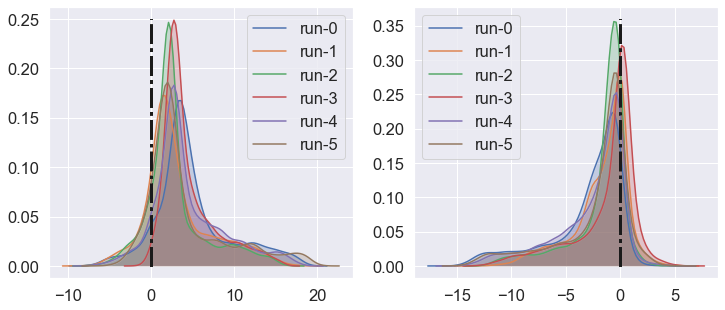

In [135]:
f, axes = plt.subplots(1, 2, figsize=(12, 5))
ax0, ax1 = axes.flatten()
sns.set(font_scale=1.5)

for i in range(6):
    sns.distplot(f0_CS[:,i]-f0_S[:,i], hist=False, kde_kws={"shade": True}, label=labels[i], ax=axes[0])
    ax0.plot([0.0, 0.0],[0 , 0.25],'k-.',linewidth=3)
    sns.distplot(f1_CS[:,i]-f1_S[:,i], hist=False, kde_kws={"shade": True}, label=labels[i], ax=axes[1])
    ax1.plot([0.0, 0.0],[0 , 0.36],'k-.',linewidth=3)
plt.savefig('CS_vs_S_vrs2.png', dpi=300, bbox_inches = 'tight')

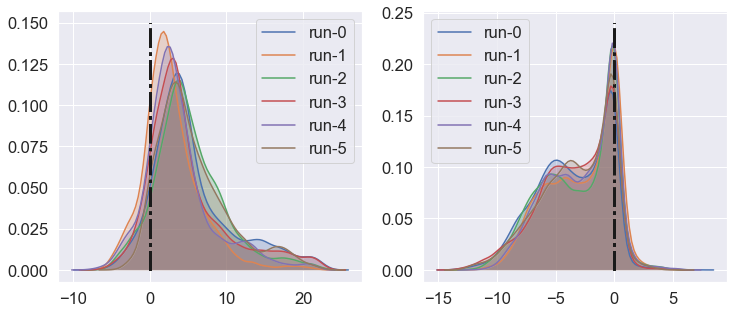

In [139]:
f, axes = plt.subplots(1, 2, figsize=(12, 5))
ax0, ax1 = axes.flatten()
sns.set(font_scale=1.5)

for i in range(6):
    sns.distplot(f0_CS[:,i]-f0_C[:,i], hist=False, kde_kws={"shade": True}, label=labels[i], ax=axes[0])
    ax0.plot([0.0, 0.0],[0 , 0.15],'k-.',linewidth=3)
    sns.distplot(f1_CS[:,i]-f1_C[:,i], hist=False, kde_kws={"shade": True}, label=labels[i], ax=axes[1])
    ax1.plot([0.0, 0.0],[0 , 0.24],'k-.',linewidth=3)
plt.savefig('CS_vs_C_vrs2.png', dpi=300, bbox_inches = 'tight')

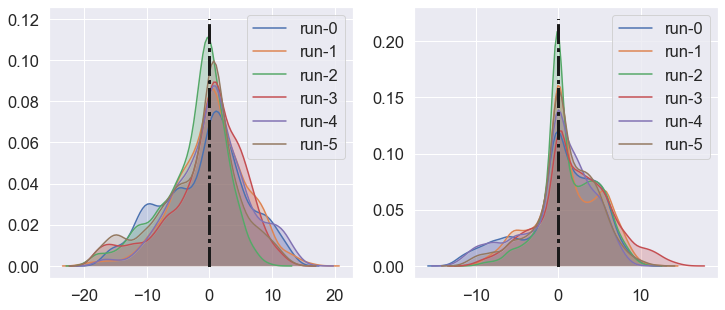

In [146]:
f, axes = plt.subplots(1, 2, figsize=(12, 5))
ax0, ax1 = axes.flatten()
sns.set(font_scale=1.5)

for i in range(6):
    sns.distplot(f0_C[:,i]-f0_S[:,i], hist=False, kde_kws={"shade": True}, label=labels[i], ax=axes[0])
    ax0.plot([0.0, 0.0],[0 , 0.12],'k-.',linewidth=3)
    sns.distplot(f1_C[:,i]-f1_S[:,i], hist=False, kde_kws={"shade": True}, label=labels[i], ax=axes[1])
    ax1.plot([0.0, 0.0],[0 , 0.22],'k-.',linewidth=3)
plt.savefig('C_vs_S_vrs2.png', dpi=300, bbox_inches = 'tight')

## CS2 vs. S1 pairwise contour plots

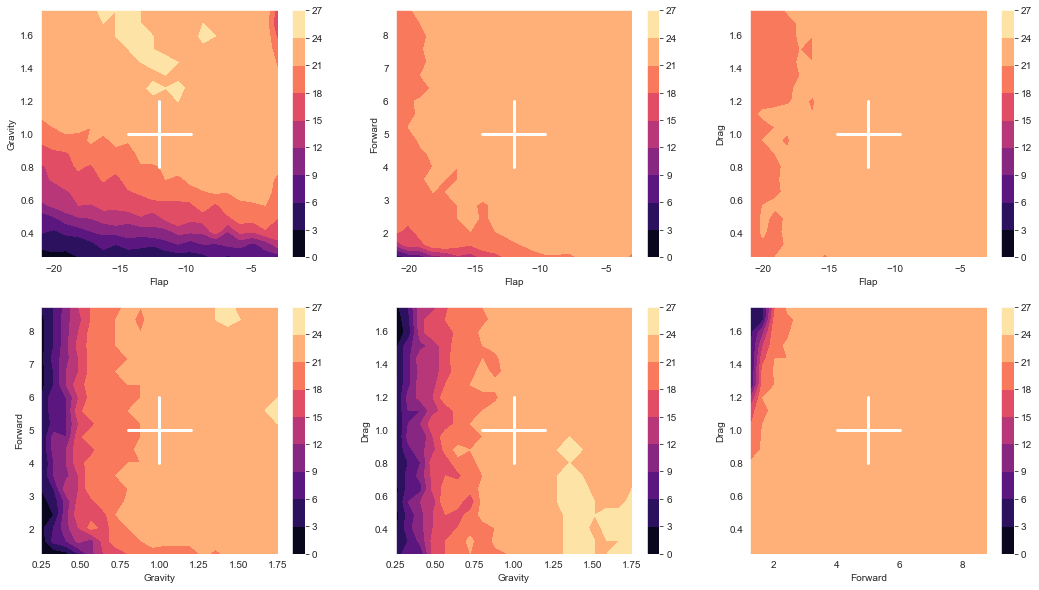

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
# plt.figure(figsize=(18,10))

font_size=18
# cmap_scheme = 'viridis'
# cmap_scheme = 'plasma'
# cmap_scheme = 'inferno'
cmap_scheme = 'magma'


plt.subplot(2,3,1)
# plt.setp(ax0.get_xticklabels(), fontsize=font_size)
# plt.setp(ax0.get_yticklabels(), fontsize=font_size)
LG_CS_f0, LG_CS_f1, LG_CS_out, L, G = pickle.load(open("1_CS2_Test/CS2_LG_contour_plots.p","rb"))
# LG_S_f0, LG_S_f1, LG_S_out, L, G = pickle.load(open("2_S1_Test/S1_LG_contour_plots.p","rb"))
CS1 = plt.contourf(L, G, LG_CS_f0, cmap=cmap_scheme)
plt.plot([-14.4, -9.6],[1., 1.],'w-',linewidth=3)
plt.plot([-12., -12.],[0.8, 1.2],'w-',linewidth=3)
plt.colorbar(CS1)
# plt.title('Difference between CS and S')
plt.xlabel('Flap')
plt.ylabel('Gravity')
# plt.show()

plt.subplot(2,3,2)
LF_CS_f0, LF_CS_f1, LF_CS_out, L, F = pickle.load(open("1_CS2_Test/CS2_LF_contour_plots.p","rb"))
# LF_S_f0, LF_S_f1, LF_S_out, L, F = pickle.load(open("2_S1_Test/S1_LF_contour_plots.p","rb"))
CS2 = plt.contourf(L, F, LF_CS_f0, CS1.levels, cmap=cmap_scheme)
plt.plot([-14.4, -9.6],[5., 5.],'w-',linewidth=3)
plt.plot([-12., -12.],[4.0, 6.0],'w-',linewidth=3)
ax1.set_aspect('equal', 'box')
plt.colorbar(CS2)
# plt.title('Difference between CS and S')
plt.xlabel('Flap')
plt.ylabel('Forward')
# plt.show()

plt.subplot(2,3,3)
LD_CS_f0, LD_CS_f1, LD_CS_out, L, D = pickle.load(open("1_CS2_Test/CS2_LD_contour_plots.p","rb"))
# LD_S_f0, LD_S_f1, LD_S_out, L, D = pickle.load(open("2_S1_Test/S1_LD_contour_plots.p","rb"))
CS3 = plt.contourf(L, D, LD_CS_f0, CS1.levels, cmap=cmap_scheme)
plt.plot([-14.4, -9.6],[1., 1.],'w-',linewidth=3)
plt.plot([-12., -12.],[0.8, 1.2],'w-',linewidth=3)
ax2.set_aspect('equal', 'box')
plt.colorbar(CS3)
# plt.title('Difference between CS and S')
plt.xlabel('Flap')
plt.ylabel('Drag')
# plt.show()

plt.subplot(2,3,4)
GF_CS_f0, GF_CS_f1, GF_CS_out, G, F = pickle.load(open("1_CS2_Test/CS2_GF_contour_plots.p","rb"))
# GF_S_f0, GF_S_f1, GF_S_out, G, F = pickle.load(open("2_S1_Test/S1_GF_contour_plots.p","rb"))
CS4 = plt.contourf(G, F, GF_CS_f0, CS1.levels, cmap=cmap_scheme)
plt.plot([0.8, 1.2],[5., 5.],'w-',linewidth=3)
plt.plot([1., 1.],[4., 6.],'w-',linewidth=3)
ax3.set_aspect('equal', 'box')
plt.colorbar(CS4)
# plt.title('Difference between CS and S')
plt.xlabel('Gravity')
plt.ylabel('Forward')
# plt.show()

plt.subplot(2,3,5)
GD_CS_f0, GD_CS_f1, GD_CS_out, G, D = pickle.load(open("1_CS2_Test/CS2_GD_contour_plots.p","rb"))
# GD_S_f0, GD_S_f1, GD_S_out, G, D = pickle.load(open("2_S1_Test/S1_GD_contour_plots.p","rb"))
CS5 = plt.contourf(G, D, GD_CS_f0, CS1.levels, cmap=cmap_scheme)
plt.plot([0.8, 1.2],[1., 1.],'w-',linewidth=3)
plt.plot([1., 1.],[0.8, 1.2],'w-',linewidth=3)
ax4.set_aspect('equal', 'box')
plt.colorbar(CS5)
# plt.title('Difference between CS and S')
plt.xlabel('Gravity')
plt.ylabel('Drag')
# plt.show()

plt.subplot(2,3,6)
FD_CS_f0, FD_CS_f1, FD_CS_out, F, D = pickle.load(open("1_CS2_Test/CS2_FD_contour_plots.p","rb"))
# FD_S_f0, FD_S_f1, FD_S_out, F, D = pickle.load(open("2_S1_Test/S1_FD_contour_plots.p","rb"))
CS6 = plt.contourf(F, D, FD_CS_f0, CS1.levels, cmap=cmap_scheme)
plt.plot([4.0, 6.0],[1., 1.],'w-',linewidth=3)
plt.plot([5., 5.],[0.8, 1.2],'w-',linewidth=3)
ax5.set_aspect('equal', 'box')
plt.colorbar(CS6)
# plt.title('Difference between CS and S')
plt.xlabel('Forward')
plt.ylabel('Drag')
# plt.show()

plt.savefig('fig_CS_contour_plots.png', dpi=300, bbox_inches = 'tight')
plt.show()

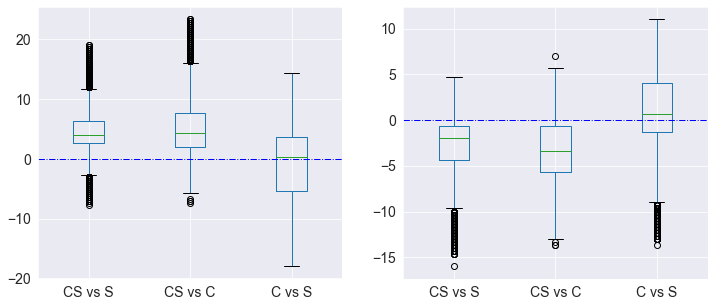

In [28]:
names=['Lift','Gravity','Fwd-Flap','Drag','pipes_mean','pipes_std','hits_mean','hits_std','outs_mean','outs_std']

data_CS = pd.read_csv('1_CS2_Test/Grid4D_CS2.csv', names=names)
data_C = pd.read_csv('4_C_Test/Grid4D_C.csv', names=names)
data_S = pd.read_csv('2_S1_Test/Grid4D_S1.csv', names=names)

f0_CS = data_CS['pipes_mean']
f0_S = data_S['pipes_mean']
f0_C = data_C['pipes_mean']

f1_CS = data_CS['hits_mean']
f1_S = data_S['hits_mean']
f1_C = data_C['hits_mean']

df0 = pd.DataFrame({'CS vs S': f0_CS-f0_S,'CS vs C':f0_CS-f0_C, 'C vs S':f0_C-f0_S})
df1 = pd.DataFrame({'CS vs S': f1_CS-f1_S,'CS vs C':f1_CS-f1_C, 'C vs S':f1_C-f1_S})

#########################################################################################
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax0, ax1 = axes.flatten()

plt.subplot(121)
df0.boxplot(fontsize=14)
plt.plot([0.5, 3.5],[0 , 0],'b-.',linewidth=1)
# plt.xlabel('\n(a) $f_0$ (pipes)',fontsize=20)
# plt.title("Generalization (pipes)", fontweight='bold', fontsize=15)

plt.subplot(122)
df1.boxplot(fontsize=14)
plt.plot([0.5, 3.5],[0 , 0],'b-.',linewidth=1)
# plt.xlabel('\n(b) $f_1$ (hits)',fontsize=20)
# plt.title("Generalization (hits)", fontweight='bold', fontsize=15)

plt.savefig('fig_boxplot.png', dpi=300, bbox_inches = 'tight')
